In [ ]:
# Instalar librerías en las versiones utilizadas en este trabajo
!pip install -r requirements.txt

In [20]:
# Importamos librerías
import pandas as pd
import numpy as np
from datetime import datetime
import geopandas as gpd
import matplotlib.pyplot as plt
import os

In [21]:
# Importar archivos
ruta_base = os.path.join(os.pardir, "Bases")
df_argenprop = pd.read_excel(ruta_base + "/Bases scrapeo/scraping_3amb_2024-12-14.xlsx")

In [22]:
#Separamos la moneda (USD o $) del valor del precio en dos columnas
df_temp = df_argenprop['Precio'].str.split(' ', expand = True)
df_argenprop['Moneda'] = df_temp[0]
df_argenprop['Precio'] = df_temp[1]


In [23]:
df_argenprop

,Precio,Barrio,Fecha,Moneda
0,1.000.000,Palermo Hollywood,2024-12-14,$
1,1.000.000,Barracas,2024-12-14,$
2,1.000.000,Barrio Norte,2024-12-14,$
3,1.000.000,Nuñez,2024-12-14,$
4,1.000.000,Recoleta,2024-12-14,$
...,...,...,...,...
1860,950,Palermo Chico,2024-12-14,USD
1861,950,Palermo Chico,2024-12-14,USD
1862,950,Palermo,2024-12-14,USD
1863,950,Palermo Chico,2024-12-14,USD


In [24]:
# Sacamos los puntos para que el precio sea solo número
df_argenprop['Precio'] = df_argenprop['Precio'].str.replace(".", "")
# Convertimos la columna precio a valores numéricos
df_argenprop["Precio"] = pd.to_numeric(df_argenprop["Precio"], errors="coerce")
# eliminamos los casos vacíos
df_argenprop = df_argenprop.dropna()
# Convertimos la columna precio a int
df_argenprop["Precio"] = df_argenprop["Precio"].astype(int)

#Reseteamos el index
df_argenprop = df_argenprop.reset_index(drop=True)

C:\Users\emita\AppData\Local\Temp\ipykernel_13552\2625085310.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argenprop["Precio"] = df_argenprop["Precio"].astype(int)


In [25]:
df_argenprop

,Precio,Barrio,Fecha,Moneda
0,1000000,Palermo Hollywood,2024-12-14,$
1,1000000,Barracas,2024-12-14,$
2,1000000,Barrio Norte,2024-12-14,$
3,1000000,Nuñez,2024-12-14,$
4,1000000,Recoleta,2024-12-14,$
...,...,...,...,...
1849,950,Palermo Chico,2024-12-14,USD
1850,950,Palermo Chico,2024-12-14,USD
1851,950,Palermo,2024-12-14,USD
1852,950,Palermo Chico,2024-12-14,USD


In [26]:
# Verificamos que precio haya quedado como integer
df_argenprop['Precio'].dtype

dtype('int64')

In [27]:
# Definimos comunas
COMUNA1 = ['Retiro', 'San Nicolás', 'Puerto Madero', 'San Telmo', 'Monserrat', "Montserrat", 'Constitución', "Tribunales", "Constitucion", "Barrio San Pedro", "Centro", "Microcentro"]
COMUNA2 = ['Recoleta', "Barrio Norte", "Plaza San Martín"]
COMUNA3 = ['Balvanera', 'San Cristóbal', "Abasto", "Congreso", "Once", "San Cristobal"]
COMUNA4  = ['La Boca', 'Barracas', 'Parque Patricios', 'Nueva Pompeya', "Boca", "Pompeya", "Catalinas"]
COMUNA5  = ['Almagro' , 'Boedo', "Almagro Norte", "Almagro Sur"]
COMUNA6  = ['Caballito', "Caballito Norte", "Caballito Sur", "Cid Campeador", "Parque Rivadavia", "Parque Centenario", "Primera Junta"]
COMUNA7  = ['Flores' , 'Parque Chacabuco', "Flores Norte", "Flores Sur"]
COMUNA8  = ['Villa Soldati', 'Villa Riachuelo' , 'Villa Lugano']
COMUNA9  = ['Liniers', 'Mataderos' , 'Parque Avellaneda']
COMUNA10 = ['Villa Real','Monte Castro','Versalles','Floresta','Vélez Sarfield', "Velez Sarsfield", 'Villa Luro', "Floresta Sur", "Floresta Norte"]
COMUNA11 = ['Villa General Mitre','Villa Devoto','Villa del Parque', 'Villa Santa Rita']
COMUNA12 = ['Coghlan','Saavedra','Villa Urquiza' , 'Villa Pueyrredón', "Villa Pueyrredon", "Urquiza R"]
COMUNA13 = ['Núñez', "Nuñez", 'Belgrano','Colegiales', "Belgrano Barrancas", "Belgrano C", "Belgrano R", "Belgrano Chico", "Lomas de Nuñez", "River"]
COMUNA14 = ['Palermo', "Botanico", "Parque Las Heras", "Las Cañitas", "Palermo Chico", "Palermo Hollywood", "Palermo Nuevo", "Palermo Soho", "Palermo Viejo", ]
COMUNA15 = ['Chacarita','Villa Crespo','La Paternal','Villa Ortúzar', "Villa Ortuzar", 'Agronomía' ,'Parque Chas', "Agronomia", "Paternal"]

In [28]:
# Definimos una función para asignar comuna al barrio
comunas = [COMUNA1, COMUNA2, COMUNA3, COMUNA4, COMUNA5, COMUNA6, COMUNA7, COMUNA8, COMUNA9, COMUNA10, COMUNA11, COMUNA12, COMUNA13, COMUNA14, COMUNA15,]
def barrio2comuna(barrio):
  for c in range(0,15):
    if barrio in comunas[c]:
      return(c+1)
  return('No se encuentra')

In [29]:
#Aplicamos la función barrio2comuna solo a las filas de la columna Barrio
df_argenprop['Comuna'] = df_argenprop['Barrio'].apply(barrio2comuna)

print(df_argenprop)

       Precio             Barrio      Fecha Moneda  Comuna
0     1000000  Palermo Hollywood 2024-12-14      $      14
1     1000000           Barracas 2024-12-14      $       4
2     1000000       Barrio Norte 2024-12-14      $       2
3     1000000              Nuñez 2024-12-14      $      13
4     1000000           Recoleta 2024-12-14      $       2
...       ...                ...        ...    ...     ...
1849      950      Palermo Chico 2024-12-14    USD      14
1850      950      Palermo Chico 2024-12-14    USD      14
1851      950            Palermo 2024-12-14    USD      14
1852      950      Palermo Chico 2024-12-14    USD      14
1853      950            Palermo 2024-12-14    USD      14

[1854 rows x 5 columns]


In [30]:
# Usamos filtro para chequear que todos los barrios se identifiquen con una comuna y, en caso contrario, asignar el barrio a la comuna

filtro = df_argenprop['Comuna'] == 'No se encuentra'
df_filtrado_sincomunas = df_argenprop[filtro]

df_filtrado_sincomunas

df_filtrado_sincomunas.to_excel(ruta_base + '/Tablas y bases análisis scraping/argenprop_comunas_missing_3amb.xlsx', index=False)

In [31]:
df_filtrado_sincomunas

,Precio,Barrio,Fecha,Moneda,Comuna


In [32]:
#Filtramos los valores en pesos para deshacernos de valores con errores / outliers
filtro = (df_argenprop["Precio"] > 200000) & (df_argenprop["Precio"] < 5000000) & (df_argenprop["Moneda"] == '$')
df_filtrado_pesos = df_argenprop[filtro]

#Reseteamos el index
df_filtrado_pesos = df_filtrado_pesos.reset_index(drop=True)

In [33]:
df_filtrado_pesos

,Precio,Barrio,Fecha,Moneda,Comuna
0,1000000,Palermo Hollywood,2024-12-14,$,14
1,1000000,Barracas,2024-12-14,$,4
2,1000000,Barrio Norte,2024-12-14,$,2
3,1000000,Nuñez,2024-12-14,$,13
4,1000000,Recoleta,2024-12-14,$,2
...,...,...,...,...,...
1368,980000,Almagro,2024-12-14,$,5
1369,980000,Belgrano,2024-12-14,$,13
1370,980000,Las Cañitas,2024-12-14,$,14
1371,980000,San Telmo,2024-12-14,$,1


In [34]:
pd.set_option('display.float_format', '{:,.0f}'.format) # Le pedimos que no use notación científica
df_filtrado_pesos['Precio'].describe()

count       1,373
mean      737,387
std       245,559
min       300,000
25%       600,000
50%       700,000
75%       800,000
max     2,800,000
Name: Precio, dtype: float64

In [35]:
#Hacemos lo mismo con los valores en dólares
filtro = (df_argenprop["Precio"] > 100) & (df_argenprop['Precio'] < 5100) & (df_argenprop["Moneda"] == 'USD')
df_filtrado_dolares = df_argenprop[filtro]

#Reseteamos el index
df_filtrado_dolares = df_filtrado_dolares.reset_index(drop=True)

In [36]:
df_filtrado_dolares

,Precio,Barrio,Fecha,Moneda,Comuna
0,1000,Recoleta,2024-12-14,USD,2
1,1000,Recoleta,2024-12-14,USD,2
2,1000,Las Cañitas,2024-12-14,USD,14
3,1000,Recoleta,2024-12-14,USD,2
4,1000,Palermo,2024-12-14,USD,14
...,...,...,...,...,...
471,950,Palermo Chico,2024-12-14,USD,14
472,950,Palermo Chico,2024-12-14,USD,14
473,950,Palermo,2024-12-14,USD,14
474,950,Palermo Chico,2024-12-14,USD,14


In [37]:
df_filtrado_dolares['Precio'].describe()

count     476
mean    1,519
std       890
min       250
25%       850
50%     1,300
75%     1,950
max     5,000
Name: Precio, dtype: float64

In [38]:
#Importamos precios históricos del dólar blue por día
df_dolar = pd.read_excel(ruta_base + "/Bases auxiliares/dolar blue histórico.xlsx")

In [39]:
# Nos quedamos con las columnas de precio de venta y fecha
df_dolar = df_dolar.drop('Compra', axis = 1)

In [40]:
#Verificamos que la columna Fecha esté seteada como datetime
df_dolar.dtypes

Fecha    datetime64[ns]
Venta            object
dtype: object

In [41]:
# Verificamos lo mismo para la columna fecha del df_filtrado_dolares
df_filtrado_dolares.dtypes

Precio             int64
Barrio            object
Fecha     datetime64[ns]
Moneda            object
Comuna             int64
dtype: object

In [42]:
# Hacemos un merge que permita asignar a cada fila el valor del dólar de acuerdo con la fecha en que fue scrapeado
df_dolar_a_pesos = pd.merge(df_filtrado_dolares, df_dolar, on='Fecha', how='left')

In [43]:
df_dolar_a_pesos

,Precio,Barrio,Fecha,Moneda,Comuna,Venta
0,1000,Recoleta,2024-12-14,USD,2,1105
1,1000,Recoleta,2024-12-14,USD,2,1105
2,1000,Las Cañitas,2024-12-14,USD,14,1105
3,1000,Recoleta,2024-12-14,USD,2,1105
4,1000,Palermo,2024-12-14,USD,14,1105
...,...,...,...,...,...,...
471,950,Palermo Chico,2024-12-14,USD,14,1105
472,950,Palermo Chico,2024-12-14,USD,14,1105
473,950,Palermo,2024-12-14,USD,14,1105
474,950,Palermo Chico,2024-12-14,USD,14,1105


In [44]:
# Renombramos la columna del precio del dólar
df_dolar_a_pesos = df_dolar_a_pesos.rename(columns = {'Venta' : 'Precio dólar'})
df_dolar_a_pesos

,Precio,Barrio,Fecha,Moneda,Comuna,Precio dólar
0,1000,Recoleta,2024-12-14,USD,2,1105
1,1000,Recoleta,2024-12-14,USD,2,1105
2,1000,Las Cañitas,2024-12-14,USD,14,1105
3,1000,Recoleta,2024-12-14,USD,2,1105
4,1000,Palermo,2024-12-14,USD,14,1105
...,...,...,...,...,...,...
471,950,Palermo Chico,2024-12-14,USD,14,1105
472,950,Palermo Chico,2024-12-14,USD,14,1105
473,950,Palermo,2024-12-14,USD,14,1105
474,950,Palermo Chico,2024-12-14,USD,14,1105


In [45]:
# Pasamos el df en dólares a pesos al precio del dolar blue del día en que se realizó el scrapeo
df_dolar_a_pesos['Precio'] = df_dolar_a_pesos['Precio'] * df_dolar_a_pesos['Precio dólar']
df_dolar_a_pesos["Precio"] = pd.to_numeric(df_dolar_a_pesos["Precio"], errors="coerce")
df_dolar_a_pesos = df_dolar_a_pesos.drop('Precio dólar', axis = 1)
df_dolar_a_pesos['Moneda'] = '$'

In [46]:
df_dolar_a_pesos

,Precio,Barrio,Fecha,Moneda,Comuna
0,1105000,Recoleta,2024-12-14,$,2
1,1105000,Recoleta,2024-12-14,$,2
2,1105000,Las Cañitas,2024-12-14,$,14
3,1105000,Recoleta,2024-12-14,$,2
4,1105000,Palermo,2024-12-14,$,14
...,...,...,...,...,...
471,1049750,Palermo Chico,2024-12-14,$,14
472,1049750,Palermo Chico,2024-12-14,$,14
473,1049750,Palermo,2024-12-14,$,14
474,1049750,Palermo Chico,2024-12-14,$,14


In [47]:
# Creamos un df con todos los valores en pesos para poder trabajar con todos los casos y sea comparable
df_unido = pd.concat([df_dolar_a_pesos, df_filtrado_pesos], ignore_index = True)

df_unido

,Precio,Barrio,Fecha,Moneda,Comuna
0,1105000,Recoleta,2024-12-14,$,2
1,1105000,Recoleta,2024-12-14,$,2
2,1105000,Las Cañitas,2024-12-14,$,14
3,1105000,Recoleta,2024-12-14,$,2
4,1105000,Palermo,2024-12-14,$,14
...,...,...,...,...,...
1844,980000,Almagro,2024-12-14,$,5
1845,980000,Belgrano,2024-12-14,$,13
1846,980000,Las Cañitas,2024-12-14,$,14
1847,980000,San Telmo,2024-12-14,$,1


In [48]:
# Armamos tabla con medidas resumen del df unido
pd.set_option('display.float_format', '{:,.0f}'.format) # Le pedimos que no use notación científica
df_tablas_resumen = df_unido['Precio'].describe()

print(df_tablas_resumen)

df_tablas_resumen.to_excel(ruta_base + '/Tablas y bases análisis scraping/Tabla_resumen_caba_3amb.xlsx')

count       1,849
mean      979,552
std       680,286
min       276,250
25%       620,000
50%       750,000
75%     1,000,000
max     5,525,000
Name: Precio, dtype: float64


In [49]:
# Armamos un groupby para sacar estadísticos por comuna
df_estadisticasxcomuna = df_unido.groupby("Comuna", as_index=False)["Precio"].describe()

print(df_estadisticasxcomuna)

df_estadisticasxcomuna.to_excel(ruta_base + '/Tablas y bases análisis scraping/Estadisticas_por_comuna_3amb.xlsx')

    Comuna  count      mean       std     min     25%     50%       75%  \
0        1    220 1,539,277 1,200,423 380,000 600,000 997,250 2,210,000   
1        2    243   983,919   505,112 450,000 700,000 828,750 1,049,750   
2        3     90   623,608   137,973 300,000 550,000 600,000   680,000   
3        4     37   672,311   239,170 340,000 480,000 650,000   800,000   
4        5    102   657,032   185,453 380,000 550,000 630,000   742,500   
5        6    127   729,289   183,818 380,000 620,000 700,000   800,000   
6        7     69   634,533   125,007 400,000 550,000 630,000   700,000   
7        8     10   490,000   107,290 350,000 412,500 490,000   515,000   
8        9     15   674,667   139,328 500,000 575,000 650,000   775,000   
9       10     47   615,106   128,569 420,000 545,000 600,000   670,000   
10      11     77   694,114   230,296 380,000 550,000 650,000   750,000   
11      12     92   836,841   301,431 400,000 650,000 785,000   885,000   
12      13    286   969,8

In [50]:
# Armamos un groupby para sacar precio promedio por comuna
df_promedioxcomuna = df_unido.groupby("Comuna", as_index=False)["Precio"].mean()
df_promedioxcomuna['Precio'] = df_promedioxcomuna['Precio'].round(1) #Redondeamos a 1 decimal
# Renombramos la columna
df_promedioxcomuna.rename(columns={"Precio": "Precio promedio"}, inplace=True)

print(df_promedioxcomuna)


    Comuna  Precio promedio
0        1        1,539,277
1        2          983,919
2        3          623,608
3        4          672,311
4        5          657,032
5        6          729,289
6        7          634,533
7        8          490,000
8        9          674,667
9       10          615,106
10      11          694,114
11      12          836,841
12      13          969,802
13      14        1,210,427
14      15          710,138


In [51]:
# Armamos groupby para ver cantidad de publicaciones por comuna
df_publicaciones_xcomuna = df_unido.groupby("Comuna", as_index=False)['Precio'].count()
# Cambiamos nombre de la columna
df_publicaciones_xcomuna.rename(columns={"Precio": "Cantidad de publicaciones"}, inplace=True)

df_publicaciones_xcomuna

,Comuna,Cantidad de publicaciones
0,1,220
1,2,243
2,3,90
3,4,37
4,5,102
5,6,127
6,7,69
7,8,10
8,9,15
9,10,47


In [52]:
# subimos archivo geográfico de comunas de caba
comunas = gpd.read_file(ruta_base + "/Archivos geográficos comunas/comunas.shp")

In [53]:
comunas

,id,objeto,comuna,barrios,perimetro,area,geometry
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852..."
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5..."
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980..."
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6..."
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6..."
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630..."
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6..."
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6..."
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62..."


In [54]:
# Mergeamos los datos geográficos de comunas con nuestro df de precio promedio por comuna con key = comuna
comunas_mapa_precio = comunas.merge(df_promedioxcomuna, left_on= 'comuna', right_on= 'Comuna')

In [55]:
# Verificamos el merge
comunas_mapa_precio

,id,objeto,comuna,barrios,perimetro,area,geometry,Comuna,Precio promedio
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...",1,"1,539,277"
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...",2,"983,919"
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...",3,"623,608"
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...",4,"672,311"
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5,"657,032"
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,"729,289"
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630...",7,"634,533"
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6...",8,"490,000"
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6...",9,"674,667"
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10,"615,106"


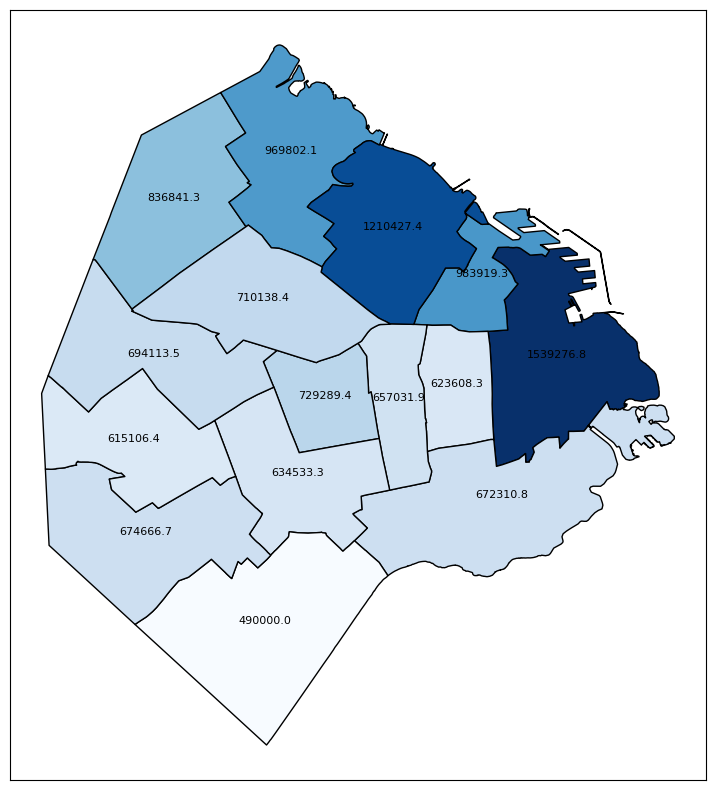

In [56]:
# Graficamos mapa precio promedio por comuna

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas_mapa_precio.plot(
    column="Precio promedio",
    ax=ax,
    cmap="Blues",
    vmin = 500000,
    vmax = 1300000,
    edgecolor="black")

# Acá admitimos que le pedimos mucha ayuda a ChatGPT que nos armó un for para asignar las etiquetas a las comunas correspondientes

for idx, row in comunas_mapa_precio.iterrows():
    # Obtenemos el centroide de la geometría para colocar la etiqueta
    centroid = row.geometry.centroid
    # Agregamos la etiqueta en el centroide, usando el valor de la columna correspondiente
    ax.text(centroid.x, centroid.y,
            f'{row["Precio promedio"]}',
            fontsize=8,
            ha='center',
            color='black')

plt.xticks([])
plt.yticks([])
plt.show()

In [57]:
# Mergeamos los datos geográficos de comunas con nuestro df de cantidad de publicaciones por comuna con key = comuna
comunas_mapa_publicaciones = comunas.merge(df_publicaciones_xcomuna, left_on= 'comuna', right_on= 'Comuna')

comunas_mapa_publicaciones

,id,objeto,comuna,barrios,perimetro,area,geometry,Comuna,Cantidad de publicaciones
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...",1,220
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...",2,243
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...",3,90
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...",4,37
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5,102
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,127
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630...",7,69
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6...",8,10
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6...",9,15
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10,47


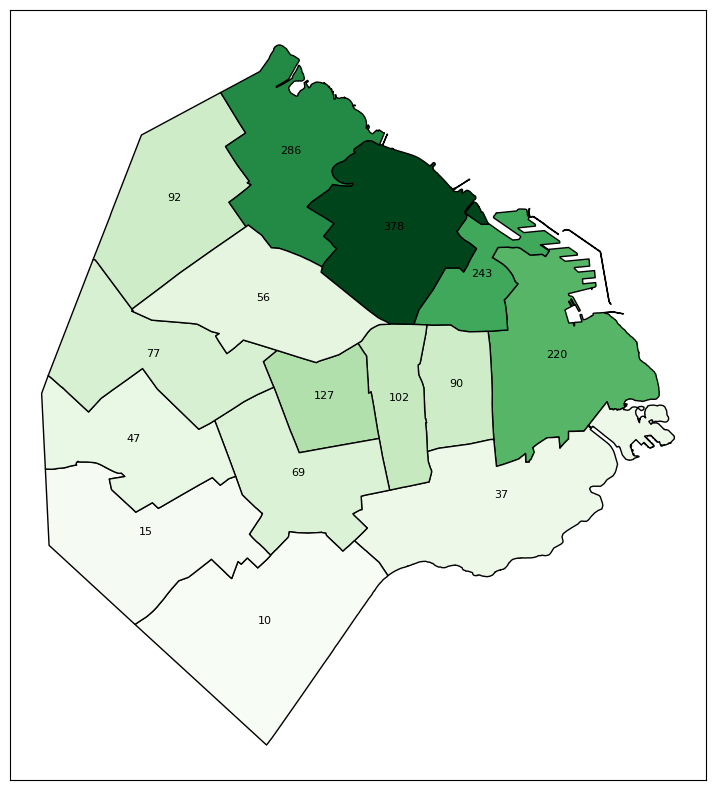

In [58]:
# Graficamos mapa cantidad de publicaciones por comuna
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas_mapa_publicaciones.plot(column="Cantidad de publicaciones",
             ax=ax,
             cmap="Greens",
             edgecolor="black")

for idx, row in comunas_mapa_publicaciones.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y,
            f'{row["Cantidad de publicaciones"]}',
            fontsize=8,
            ha='center',
            color='black')

plt.xticks([])
plt.yticks([])
plt.show()

In [59]:
# Hacemos groupby para contar cantidad de publicaciones en dólares por comuna
df_publicaciones_dolar = df_filtrado_dolares.groupby("Comuna", as_index=False)['Precio'].count()
# Renombramos columna
df_publicaciones_dolar.rename(columns={"Precio": "Cantidad de publicaciones en dolares"}, inplace=True)

df_publicaciones_dolar

,Comuna,Cantidad de publicaciones en dolares
0,1,107
1,2,83
2,3,11
3,4,3
4,5,3
5,6,6
6,7,6
7,11,6
8,12,10
9,13,68


In [60]:
# Mergeamos df de cantidad de publicaciones por comuna total con el de cantidad de publicaciones en dólares con key = comuna para poder hacer división despues
# usamos how = outer porque teníamos tres comunas sin publicaciones en dólares pero no queríamos perder el dato
df_prop_dolar = df_publicaciones_xcomuna.merge(df_publicaciones_dolar, left_on= 'Comuna', right_on= 'Comuna', how='outer')

df_prop_dolar

,Comuna,Cantidad de publicaciones,Cantidad de publicaciones en dolares
0,1,220,107
1,2,243,83
2,3,90,11
3,4,37,3
4,5,102,3
5,6,127,6
6,7,69,6
7,8,10,NaN
8,9,15,NaN
9,10,47,NaN


In [61]:
# Sacamos proporción de publicaciones en dólares sobre publicaciones totales para cada comuna * 100 (para tenerlo en %)
df_prop_dolar['Proporcion de publicaciones en dolares'] = df_prop_dolar['Cantidad de publicaciones en dolares'] / df_prop_dolar['Cantidad de publicaciones'] * 100

# Reemplazamos los NaN por ceros
df_prop_dolar.fillna(0, inplace=True)
# Redondeamos a 2 decimales
df_prop_dolar['Proporcion de publicaciones en dolares'] = df_prop_dolar['Proporcion de publicaciones en dolares'].round(2)

df_prop_dolar

,Comuna,Cantidad de publicaciones,Cantidad de publicaciones en dolares,Proporcion de publicaciones en dolares
0,1,220,107,49
1,2,243,83,34
2,3,90,11,12
3,4,37,3,8
4,5,102,3,3
5,6,127,6,5
6,7,69,6,9
7,8,10,0,0
8,9,15,0,0
9,10,47,0,0


In [62]:
# Mergeamos nuevamente los datos geográficos de comuna con el df de proporción en dólares con key = comuna
comunas_prop_dolares = comunas.merge(df_prop_dolar, left_on= 'comuna', right_on= 'Comuna')

comunas_prop_dolares

,id,objeto,comuna,barrios,perimetro,area,geometry,Comuna,Cantidad de publicaciones,Cantidad de publicaciones en dolares,Proporcion de publicaciones en dolares
0,1,COMUNA,1,"CONSTITUCION, MONSERRAT, RETIRO, PUERTO MADERO...","36,012","17,784,744","MULTIPOLYGON (((-58.36855 -34.57365, -58.36852...",1,220,107,49
1,2,COMUNA,2,RECOLETA,"21,450","6,317,726","POLYGON ((-58.38001 -34.57002, -58.38003 -34.5...",2,243,83,34
2,3,COMUNA,3,"SAN CRISTOBAL, BALVANERA","10,486","6,385,991","POLYGON ((-58.41192 -34.598, -58.4103 -34.5980...",3,90,11,12
3,4,COMUNA,4,"BARRACAS, BOCA, PARQUE PATRICIOS, NUEVA POMPEYA","35,474","21,688,665","POLYGON ((-58.35521 -34.61943, -58.35514 -34.6...",4,37,3,8
4,5,COMUNA,5,"ALMAGRO, BOEDO","12,323","6,660,603","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6...",5,102,3,3
5,6,COMUNA,6,CABALLITO,"10,991","6,851,029","POLYGON ((-58.43061 -34.60705, -58.43056 -34.6...",6,127,6,5
6,7,COMUNA,7,"FLORES, PARQUE CHACABUCO","17,972","12,422,901","POLYGON ((-58.452 -34.62974, -58.45158 -34.630...",7,69,6,9
7,8,COMUNA,8,"VILLA LUGANO, VILLA RIACHUELO, VILLA SOLDATI","20,943","22,218,817","POLYGON ((-58.44913 -34.65116, -58.44883 -34.6...",8,10,0,0
8,9,COMUNA,9,"PARQUE AVELLANEDA, MATADEROS, LINIERS","21,412","16,505,306","POLYGON ((-58.51925 -34.63301, -58.51908 -34.6...",9,15,0,0
9,10,COMUNA,10,"FLORESTA, MONTE CASTRO, VELEZ SARSFIELD, VERSA...","18,332","12,656,557","POLYGON ((-58.48834 -34.62016, -58.4882 -34.62...",10,47,0,0


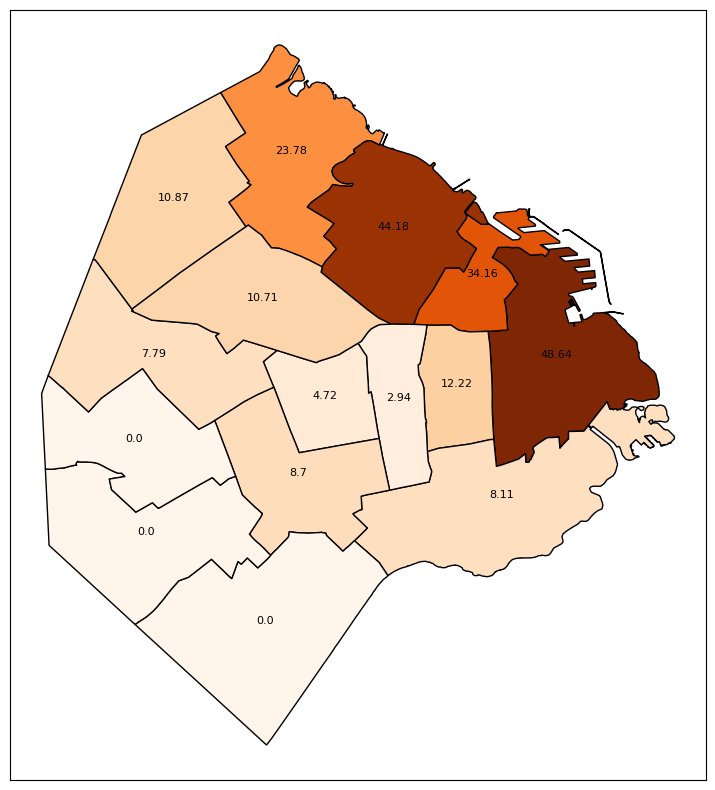

In [63]:
# Armamos el ùltimo gráfico de % de publicaciones en dólares por comuna
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
comunas_prop_dolares.plot(column="Proporcion de publicaciones en dolares",
             ax=ax,
             cmap="Oranges",
             edgecolor="black")

for idx, row in comunas_prop_dolares.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y,
            f'{row["Proporcion de publicaciones en dolares"]}',
            fontsize=8,
            ha='center',
            color='black')

plt.xticks([])
plt.yticks([])
plt.show()